# Linear Regression 

The term "linearity" in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two dimensional space (between two variables, in this case), we get a straight line.

Let's consider a scenario where we want to determine the linear relationship between the numbers of hours a student studies and the percentage of marks that student scores in an exam. We want to find out that given the number of hours a student prepares for a test, about how high of a score can the student achieve? If we plot the independent variable (hours) on the x-axis and dependent variable (percentage) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

We know that the equation of a straight line is basically: y = mx + c

Where c is the intercept and m is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed.

## Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## EDA

In [3]:
data.shape

(25, 2)

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


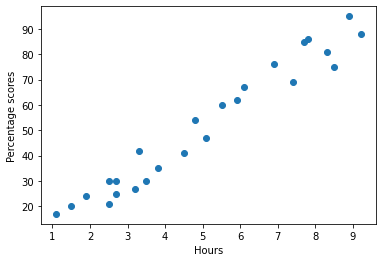

In [11]:
plt.scatter(data.Hours,data.Scores)
plt.xlabel('Hours')
plt.ylabel('Percentage scores')
plt.show()

In [13]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
# Preparing the data

X = data.iloc[:,:-1].values
y = data.iloc[:,-1]


In [15]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [17]:
print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [18]:
# Split data for training  and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3 , random_state = 0)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


In [20]:
# Training the Algorithm

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
model.fit(X_train , y_train)


LinearRegression()

In [22]:
model.intercept_

2.3708153823418883

In [23]:
model.coef_

array([9.78856669])

In [24]:
# Model Building

y_pred = model.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [26]:
#To compare the actual output values for X_test with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


## Evaluating the Algorithm

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

2. Mean Squared Error (MSE) is the mean of the squared errors.

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

4. R2 Score



In [27]:
from sklearn import metrics

print("Mean Absolute Error    : ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error     : ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 score value         : ",metrics.r2_score(y_test,y_pred))

Mean Absolute Error    :  4.419727808027651
Mean Squared error     :  22.965097212700428
Root Mean Squared Error:  4.7921912746363144
R2 score value         :  0.9568211104435257


     Result Statement: 

    You can see that the value of root mean squared error is 4.79, which is less than 10% of the mean value of the percentages of all the students . And R2 score is >=0.7 means the values is close to 1.So it is a better model.This means that our algorithm did a decent job.